# 📊 Proyecto Guiado - Análisis de Ventas de Videojuegos
## Parte 2: Exploración Inicial - EDA

---

### 🎯 Objetivos de este notebook:
1. Realizar análisis estadístico descriptivo
2. Detectar valores nulos y duplicados
3. Analizar variables categóricas
4. Crear nuestras primeras visualizaciones
5. Identificar patrones iniciales en los datos

---

## 1. Importar librerías y cargar datos

In [6]:
%pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# Importar librerías
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones
pd.set_option("display.max_columns", 100)  # Mostrar todas las columnas

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


# Cargar dataset
df = pd.read_csv(r"C:\Users\Propietario\OneDrive\Escritorio\Data_analysis\Modulo_1\7.Proyectos guiados\vgsales.csv")
print("Librerías importadas y dataset cargado correctamente.")
print(f"Dimensiones del dataset: {df.shape[0]:,} filas y {df.shape[1]} columnas")


Librerías importadas y dataset cargado correctamente.
Dimensiones del dataset: 16,598 filas y 11 columnas


---
## 2. Análisis Estadístico Descriptivo

El método `.describe()` proporciona estadísticas descriptivas de las columnas numéricas:
- **count**: Cantidad de valores no nulos
- **mean**: Promedio
- **std**: Desviación estándar (dispersión)
- **min**: Valor mínimo
- **25%, 50%, 75%**: Cuartiles (percentiles)
- **max**: Valor máximo

In [8]:
# Estadísticas descriptivas de variables numéricas
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### 🔍 Interpretación:
Year va desde 1980 hasta 2020.  la media del año que se vendieron los juegos de 2006. 
Además, las ventas globales tienen una media de 0.537 millones, teniendo en cuenta que llega a un maximo de 82.740000 millones. Tambien se observa que en Norte America y Europa en cabezan las ventas, mientras que en Japon y otros territorios las ventas son menores. Y hay variabilidad alta


### 🔍 Interpretación:


In [9]:
# Estadísticas de variables categóricas
print("\nEstadísticas descriptivas - variables categóricas:")
print("-" * 80)
df.describe(include=['object'])


Estadísticas descriptivas - variables categóricas:
--------------------------------------------------------------------------------


,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


### 🔍 Interpretación
Hay 31 plataformas diferentes y se repiten. La DS es la que mas se reoite en  ek 

Name: 11,493 juegos unicos (algunos pueden estar en varias plataformas)
Platformn: 31 plataformas diferentes, DS es la mas frecuente
Genre: 12 generos, Action es el mas comun
Publisher: 579 editores, Electronic Arts es el top

---
## 3. Análisis de Valores Nulos

Los valores nulos (NaN, None, missing values) son un problema común.
Debemos identificarlos y decidir cómo manejarlos.

In [10]:
# Contar valores nulos por columna
# Crear un DataFrame con la información de nulos
nulos_info = pd.DataFrame({
    "columna":df.columns,
    "valores_nulos":df.isnull().sum(),
    "porcentaje": (df.isnull().mean() * 100)
}).sort_values(by="valores_nulos", ascending=False)

print(nulos_info.to_string(index=False))

# Resumen
print("\nResumen del dataset:")
total_nulos = df.isnull().sum().sum()
total_celdas = df.shape[0] * df.shape[1]
print(f"📌 Total de valores nulos en el dataset: {total_nulos:,}")
print(f"📌 Porcentaje total de nulos: {(total_nulos / total_celdas * 100):.2f}%")

     columna  valores_nulos  porcentaje
        Year            271    1.632727
   Publisher             58    0.349440
        Rank              0    0.000000
    Platform              0    0.000000
        Name              0    0.000000
       Genre              0    0.000000
    NA_Sales              0    0.000000
    EU_Sales              0    0.000000
    JP_Sales              0    0.000000
 Other_Sales              0    0.000000
Global_Sales              0    0.000000

Resumen del dataset:
📌 Total de valores nulos en el dataset: 329
📌 Porcentaje total de nulos: 0.18%


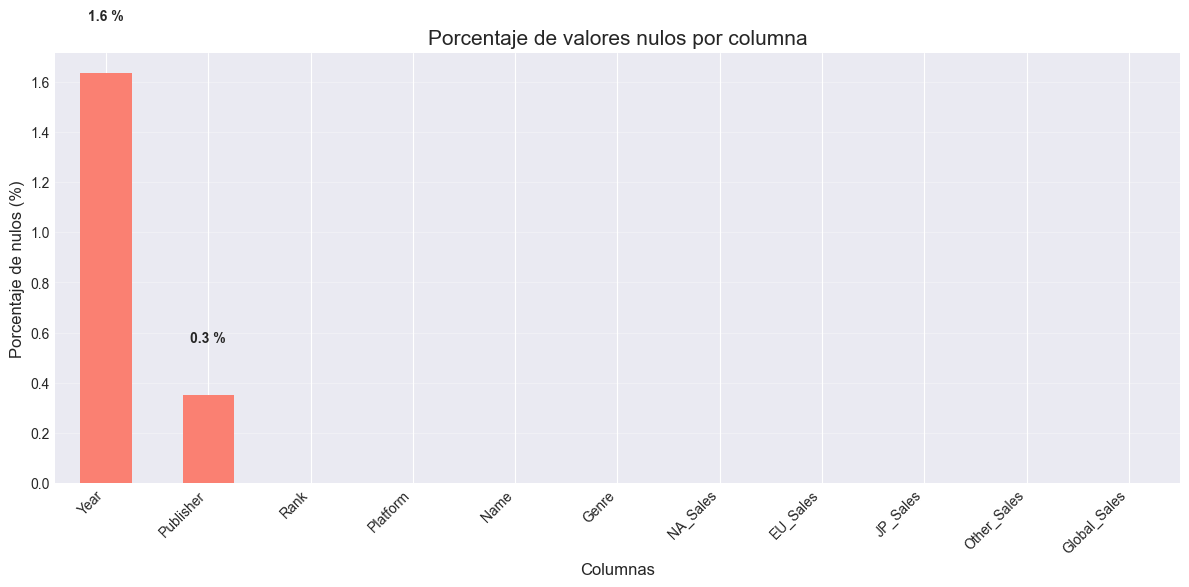

Gráfico generado correctamente.


In [11]:
# Visualización de valores nulos
plt.figure(figsize=(12, 6))

# Calcular porcentaje de nulos
nulos_pct = (df.isnull().sum() / len(df)) * 100
nulos_pct = nulos_pct.sort_values(ascending=False)

# Crear gráfico de barras
ax = nulos_pct.plot(kind='bar', color='salmon')

plt.title("Porcentaje de valores nulos por columna", fontsize=15)
plt.xlabel("Columnas", fontsize=12)
plt.ylabel("Porcentaje de nulos (%)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)

# Añadir valores sobre las barras
for i, v in enumerate(nulos_pct):
    if v > 0: 
        ax.text(i, v + 0.2, f"{v:.1f} %", ha="center", va="bottom", fontweight="bold")

plt.tight_layout()
plt.show()
print("Gráfico generado correctamente.")




---
## 4. Análisis de Duplicados

Los registros duplicados pueden distorsionar nuestro análisis.

In [12]:
# Verificar duplicados completos (todas las columnas iguales)
print("analisis de duplicados")
 
duplicados_completos = df.duplicated().sum()
print(f"📌 Total de filas duplicadas (todas las columnas): {duplicados_completos}")
 
# Verificar duplicados por nombre de juego
duplicados_nombre = df['Name'].duplicated().sum()
print(f"Juegos con nombres duplicados: {duplicados_nombre}")
 
# Mostrar algunos ejemplos de juegos duplicados
if duplicados_nombre > 0:
    print("\n Ejemplos de juegos que aparecen en multiples plataformas:")
    juegos_duplicados = df[df['Name'].duplicated(keep=False)].sort_values(by='Name')
    print(juegos_duplicados[['Name', 'Platform', 'Year', 'Global_Sales']].head(10))    

analisis de duplicados
📌 Total de filas duplicadas (todas las columnas): 0
Juegos con nombres duplicados: 5105

 Ejemplos de juegos que aparecen en multiples plataformas:
                               Name Platform    Year  Global_Sales
1739         007: Quantum of Solace      PS3  2008.0          1.16
9318         007: Quantum of Solace       DS  2008.0          0.14
14547        007: Quantum of Solace       PC  2008.0          0.03
1273         007: Quantum of Solace     X360  2008.0          1.49
4499         007: Quantum of Solace      PS2  2008.0          0.43
3038         007: Quantum of Solace      Wii  2008.0          0.67
2247   007: The World is not Enough       PS  2000.0          0.92
1200   007: The World is not Enough      N64  2000.0          1.55
15005             11eyes: CrossOver     X360  2009.0          0.02
15552             11eyes: CrossOver      PSP  2010.0          0.02


### 
Los duplicados de este dataset no se eliminan ya que un mismo juego puede estar en varias plataformas. Por lo que no nos contamina el análisis.

---
## 5. Análisis de Variables Categóricas

Vamos a explorar las variables categóricas en profundidad.

### 5.1 Plataformas (Platform)

Analisis de plataformas
Numero total de plataformas: 31

Top 10 plataformas por número de juegos:
Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
Name: count, dtype: int64


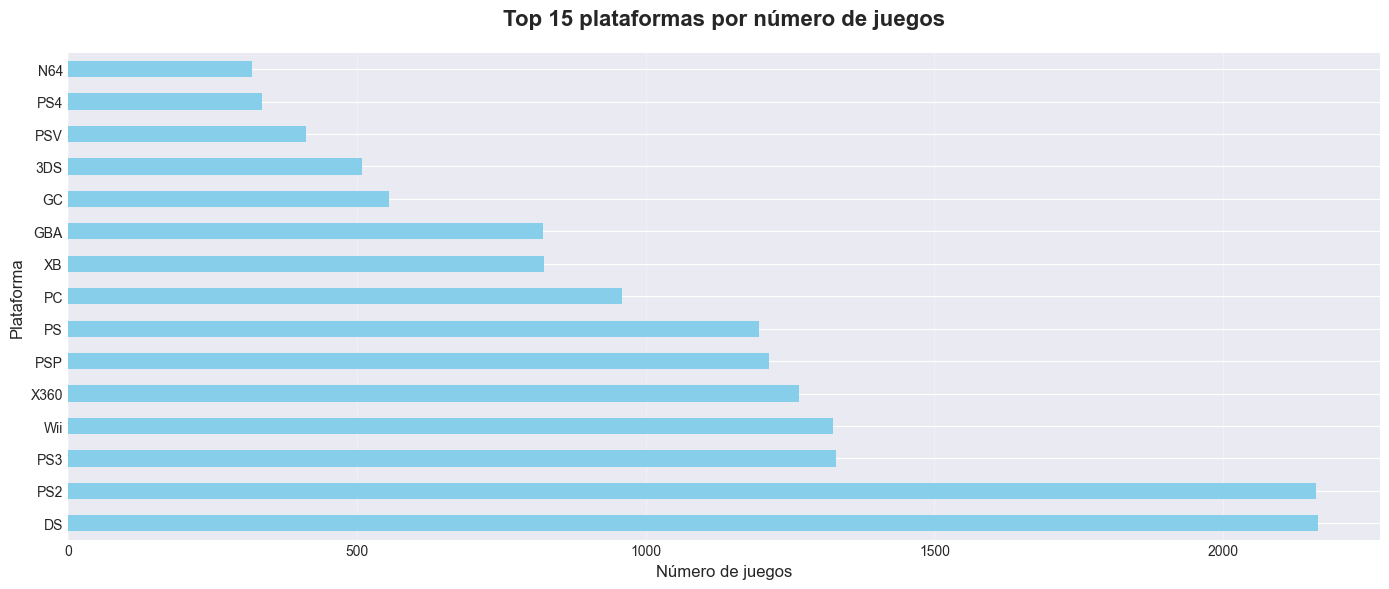

In [ ]:
# Análisis de plataformas
 
# Contar la frecuencia de cada plataforma usando value_counts()
# value_counts() retorna una Serie con el conteo de valores únicos en orden descendente
plataformas = df['Platform'].value_counts()
 
# Mostrar el número total de plataformas únicas
# nunique() cuenta el número de valores únicos en la columna
print(f"Numero total de plataformas: {df['Platform'].nunique()}")
 
# Mostrar las 10 plataformas con más juegos
# head(10) selecciona los primeros 10 elementos de la Serie
print(f"\nTop 10 plataformas por número de juegos:")
print(plataformas.head(10))
 
# Visualización de las top 15 plataformas
# figsize=(14, 6) establece el tamaño de la figura en pulgadas (ancho, alto)
plt.figure(figsize=(14, 6))
 
# Crear gráfico de barras horizontales
# head(15) selecciona las top 15 plataformas
# kind='barh' especifica un gráfico de barras horizontal
# color='skyblue' establece el color de las barras
plataformas.head(15).plot(kind='barh', color='skyblue')
 
# Configurar título del gráfico
# fontsize=16 establece el tamaño de la fuente
# fontweight='bold' hace el texto en negrita
# pad=20 añade espacio entre el título y el gráfico
plt.title('Top 15 plataformas por número de juegos', fontsize=16, fontweight='bold', pad=20)
 
# Configurar etiqueta del eje X (horizontal)
# fontsize=12 establece el tamaño de la fuente
plt.xlabel('Número de juegos', fontsize=12)
 
# Configurar etiqueta del eje Y (vertical)
# fontsize=12 establece el tamaño de la fuente
plt.ylabel('Plataforma', fontsize=12)
 
# Añadir cuadrícula al eje X para facilitar la lectura
# axis='x' especifica que la cuadrícula solo aparece en el eje X
# alpha=0.3 establece la transparencia de la cuadrícula (0=invisible, 1=opaco)
plt.grid(axis='x', alpha=0.3)
 
# Ajustar automáticamente el diseño para evitar que se corten elementos
plt.tight_layout()
 
# Mostrar el gráfico en pantalla
plt.show()

### 5.2 Géneros (Genre)

Análisis de géneros
--------------------------------------------------------------------------------
Total de géneros únicos: 12

 Distribucion de generos:
Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Name: count, dtype: int64


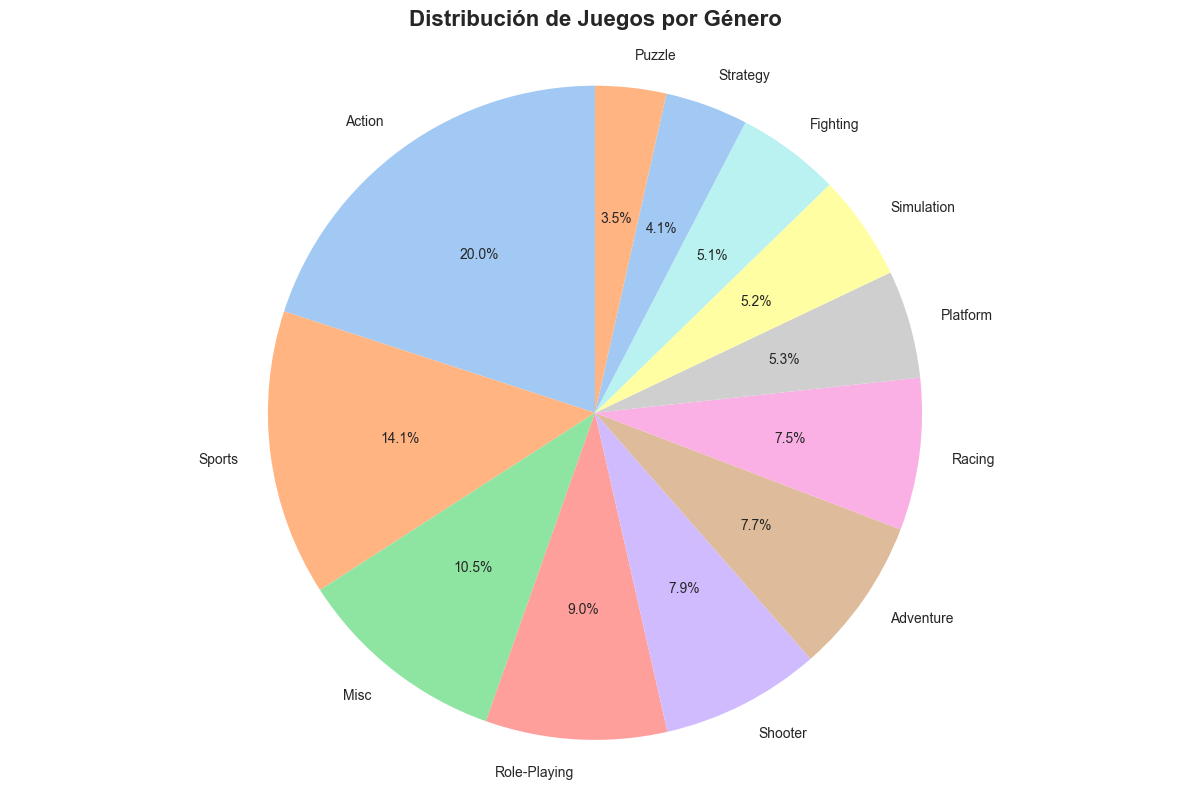

In [14]:
# Análisis de géneros
print("Análisis de géneros")
print("-" * 80)

# Contar géneros
generos = df['Genre'].value_counts()
print(f"Total de géneros únicos: {df['Genre'].nunique()}")
print(f"\n Distribucion de generos:")
print(generos.head(10))


# Visualización con gráfico de pastel
plt.figure(figsize=(12, 8))
colors = sns.color_palette('pastel', len(generos))
plt.pie(generos.values, labels=generos.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribución de Juegos por Género', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

### 5.3 Publishers (Editores)

Análisis de publishers
--------------------------------------------------------------------------------
Total de publishers únicos (sin nulos): 578

Top 10 publishers por número de juegos:
Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Computer Entertainment      683
Sega                             639
Take-Two Interactive             413
Name: count, dtype: int64


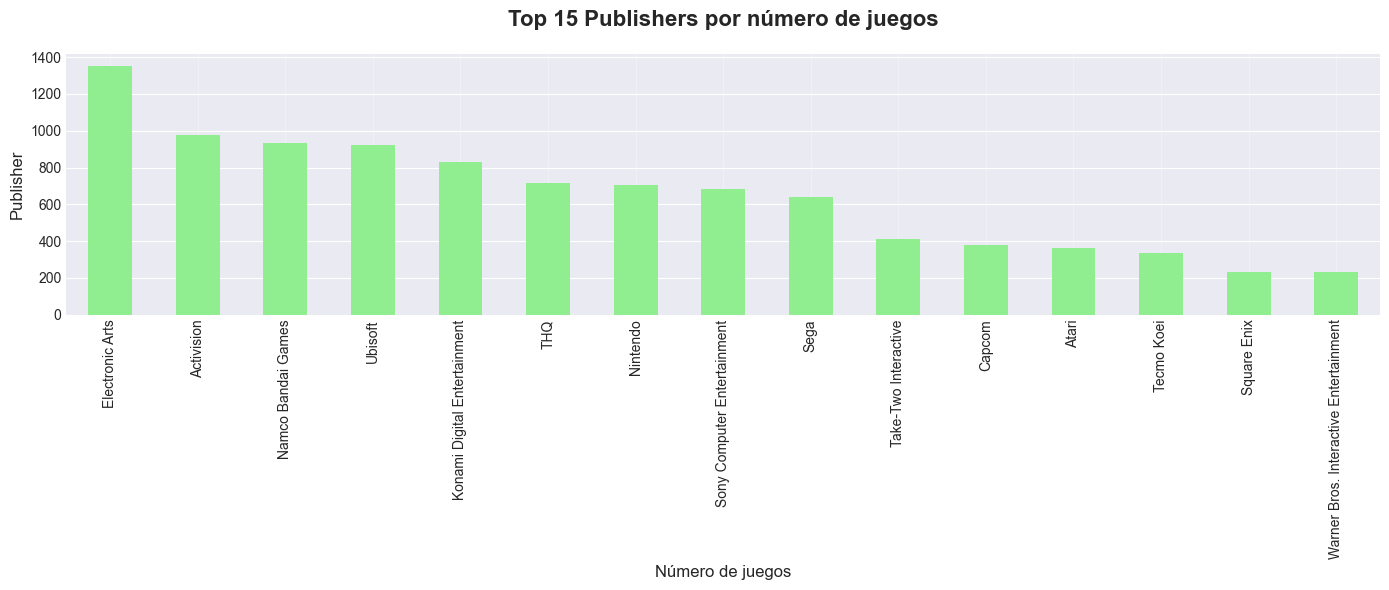

In [15]:
# Análisis de publishers
print("Análisis de publishers")
print("-" * 80)

# Eliminar nulos para este análisis
publishers = df['Publisher'].dropna().value_counts()
print(f"Total de publishers únicos (sin nulos): {df['Publisher'].nunique()}")
print(f"\nTop 10 publishers por número de juegos:")
print(publishers.head(10))

# Visualización
plt.figure(figsize=(14, 6))
publishers.head(15).plot(kind='bar', color='lightgreen')
plt.title('Top 15 Publishers por número de juegos', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Número de juegos', fontsize=12)
plt.ylabel('Publisher', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### 5.4 Años (Year)

Análisis temporal
Año mas antiguo: 1980
Año mas reciente: 2020
Años con datos faltantes: 271


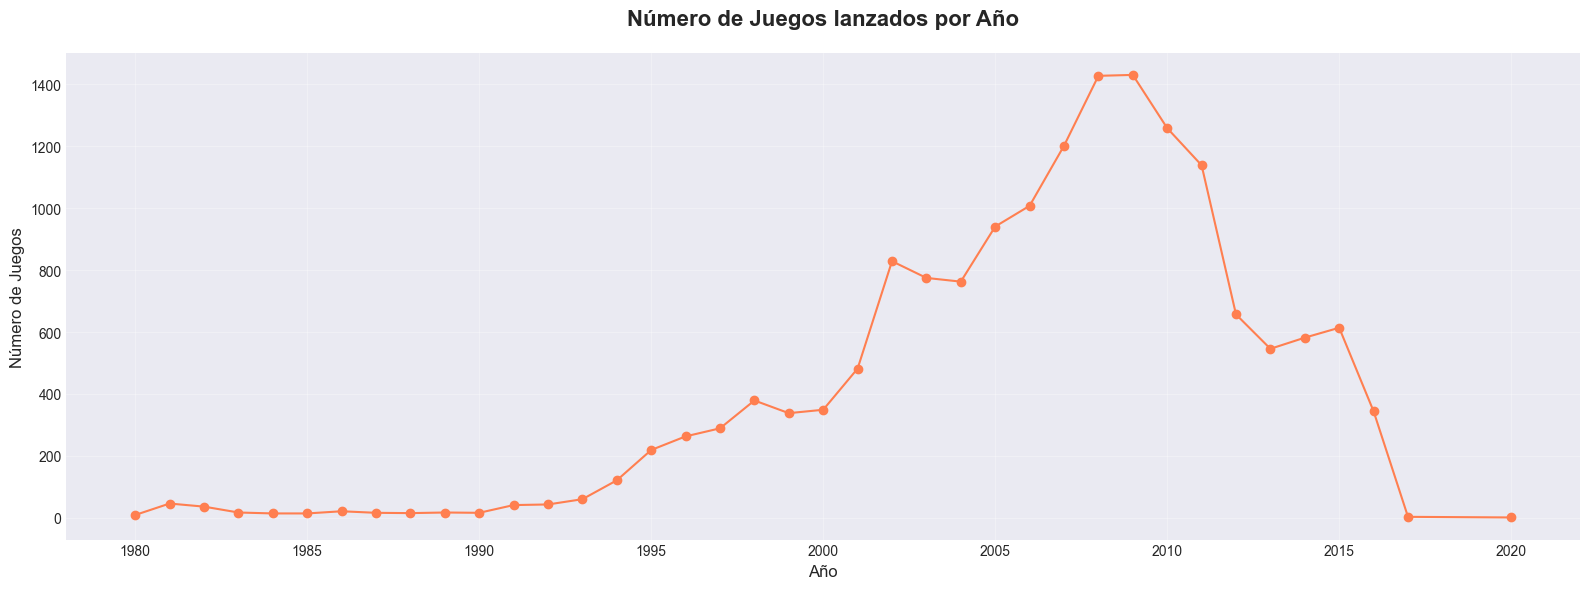

In [16]:
# Análisis temporal
print("Análisis temporal")
print("=" * 80)

# Información básica
print(f"Año mas antiguo: {int(df['Year'].min())}")
print(f"Año mas reciente: {int(df['Year'].max())}")
print(f"Años con datos faltantes: {df['Year'].isnull().sum()}")
 
# Distribución por año
años = df['Year'].dropna().value_counts().sort_index()
 
# Visualización
plt.figure(figsize=(16, 6))
plt.plot(años.index, años.values, marker='o', linestyle='-', color='coral')
plt.title('Número de Juegos lanzados por Año', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Juegos', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
 

---
## 6. Análisis de Ventas

Ahora vamos a analizar las variables más importantes: las ventas.

In [17]:
# Estadísticas de ventas por región
print("Estadísticas de ventas por región")
print("=" * 80)

columnas_ventas = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
total_global = df['Global_Sales'].sum()
# Crear DataFrame con estadísticas
stats_ventas = df[columnas_ventas].describe().T

stats_ventas['Total'] = df[columnas_ventas].sum()

print(stats_ventas)
# Calcular porcentaje de ventas por región
porcentaje_ventas = {
    "Norteamerica": (df['NA_Sales'].sum() / total_global) * 100,
    "Europa": (df['EU_Sales'].sum() / total_global) * 100,
    "Japon": (df['JP_Sales'].sum() / total_global) * 100,
    "Otros": (df['Other_Sales'].sum() / total_global) * 100
}

for region, pct in porcentaje_ventas.items():
    print(f"📌 {region:15} {pct:6.2}%")

Estadísticas de ventas por región
                count      mean       std   min   25%   50%   75%    max  \
NA_Sales      16598.0  0.264667  0.816683  0.00  0.00  0.08  0.24  41.49   
EU_Sales      16598.0  0.146652  0.505351  0.00  0.00  0.02  0.11  29.02   
JP_Sales      16598.0  0.077782  0.309291  0.00  0.00  0.00  0.04  10.22   
Other_Sales   16598.0  0.048063  0.188588  0.00  0.00  0.01  0.04  10.57   
Global_Sales  16598.0  0.537441  1.555028  0.01  0.06  0.17  0.47  82.74   

                Total  
NA_Sales      4392.95  
EU_Sales      2434.13  
JP_Sales      1291.02  
Other_Sales    797.75  
Global_Sales  8920.44  
📌 Norteamerica    4.9e+01%
📌 Europa          2.7e+01%
📌 Japon           1.4e+01%
📌 Otros              8.9%


In [18]:
# Visualización de ventas por región
plt.figure(figsize=(12, 6)) 

# Datos para el gráfico
regiones = list (porcentaje_ventas.keys())
ventas = [df["NA_Sales"].sum(), df["EU_Sales"].sum(), df["JP_Sales"].sum(), df["Other_Sales"].sum()]

# Crear gráfico de barras
bars = plt.bar(regiones, ventas, color=['skyblue', 'lightgreen', 'salmon', 'orange'])

plt.title("Ventas Totales por Región", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Región", fontsize=12)
plt.ylabel("Ventas (millones de unidades)", fontsize=12)
plt.grid(axis="y", alpha=0.3)

# Añadir valores sobre las barras
for bar in bars:
       #### Falta completar

SyntaxError: incomplete input (2504611285.py, line 18)

---
## 7. Top Juegos, Plataformas y Géneros por Ventas

In [19]:
# Top 10 juegos más vendidos
print("Top 10 juegos más vendidos globalmente")
print("=" * 80)

# Ordenar por ventas globales y mostrar los 10 primeros
top_juegos = df[['Name', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(10)

print(top_juegos.to_string(index=False))


Top 10 juegos más vendidos globalmente
                     Name  Global_Sales
               Wii Sports         82.74
        Super Mario Bros.         40.24
           Mario Kart Wii         35.82
        Wii Sports Resort         33.00
 Pokemon Red/Pokemon Blue         31.37
                   Tetris         30.26
    New Super Mario Bros.         30.01
                 Wii Play         29.02
New Super Mario Bros. Wii         28.62
                Duck Hunt         28.31


Ventas por plataforma
Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
Name: Global_Sales, dtype: float64


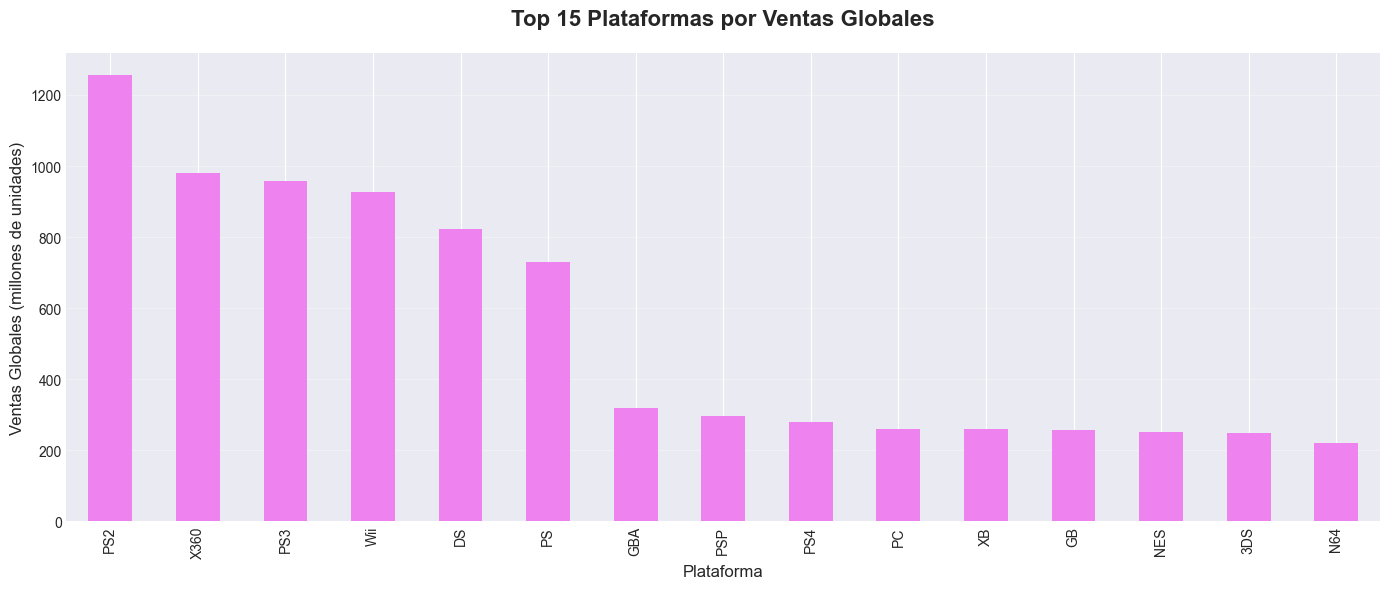

In [20]:
# Ventas por plataforma
print("Ventas por plataforma")
print("=" * 80)

ventas_plataforma = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
print(ventas_plataforma.head())

# Visualización
plt.figure(figsize=(14, 6))
ventas_plataforma.head(15).plot(kind='bar', color='violet')
plt.title('Top 15 Plataformas por Ventas Globales', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Globales (millones de unidades)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Ventas por género


# Visualización


---
## 8. Distribución de Ventas (Histogramas)

Los histogramas nos muestran cómo se distribuyen las ventas.

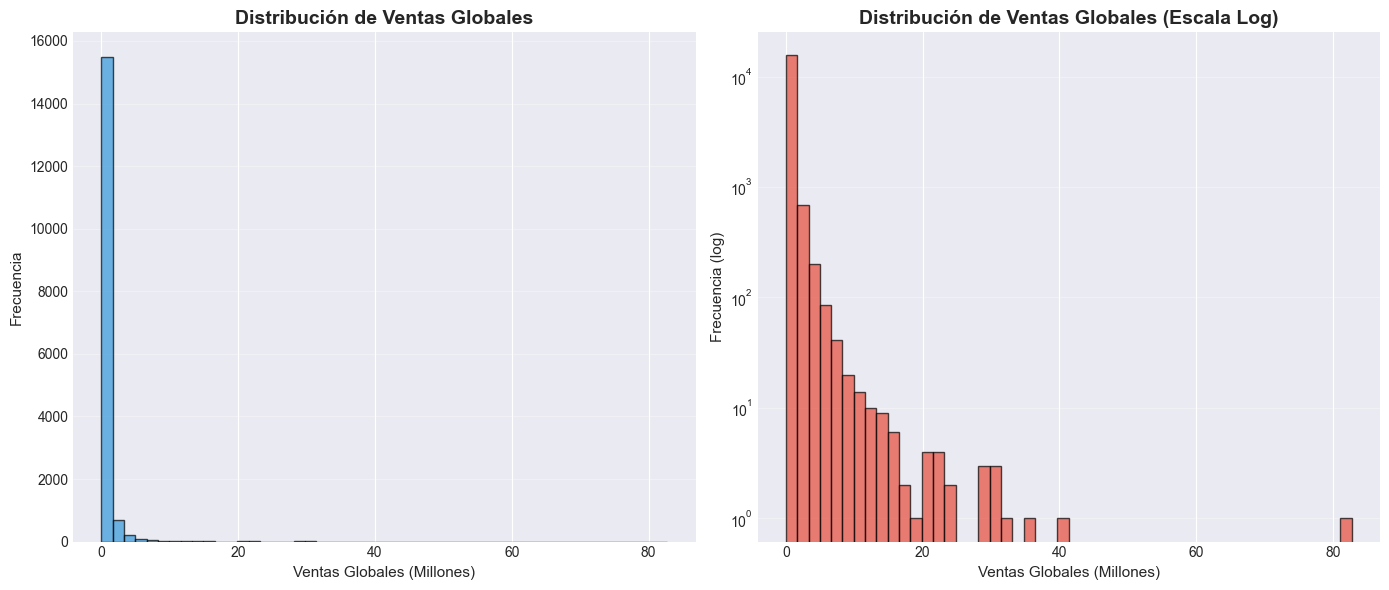

💡 Observación: La mayoría de juegos tiene ventas muy bajas, y solo unos pocos son grandes éxitos (distribución sesgada).


In [ ]:
# Histograma de ventas globales
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Global_Sales'], bins=50, color='#3498db', edgecolor='black', alpha=0.7)
plt.title('Distribución de Ventas Globales', fontsize=14, fontweight='bold')
plt.xlabel('Ventas Globales (Millones)', fontsize=11)
plt.ylabel('Frecuencia', fontsize=11)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
# Escala logarítmica para ver mejor la distribución
plt.hist(df['Global_Sales'], bins=50, color='#e74c3c', edgecolor='black', alpha=0.7)
plt.yscale('log')  # Escala logarítmica en Y
plt.title('Distribución de Ventas Globales (Escala Log)', fontsize=14, fontweight='bold')
plt.xlabel('Ventas Globales (Millones)', fontsize=11)
plt.ylabel('Frecuencia (log)', fontsize=11)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 Observación: La mayoría de juegos tiene ventas muy bajas, y solo unos pocos son grandes éxitos (distribución sesgada).")


---
## 9. Boxplots - Identificación de Outliers

Los boxplots nos ayudan a identificar valores atípicos (outliers).

C:\Users\Propietario\AppData\Local\Temp\ipykernel_16152\1271652872.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp= plt.boxplot([datos_boxplot['NA_Sales'], datos_boxplot['EU_Sales'], datos_boxplot['JP_Sales'], datos_boxplot['Other_Sales']],


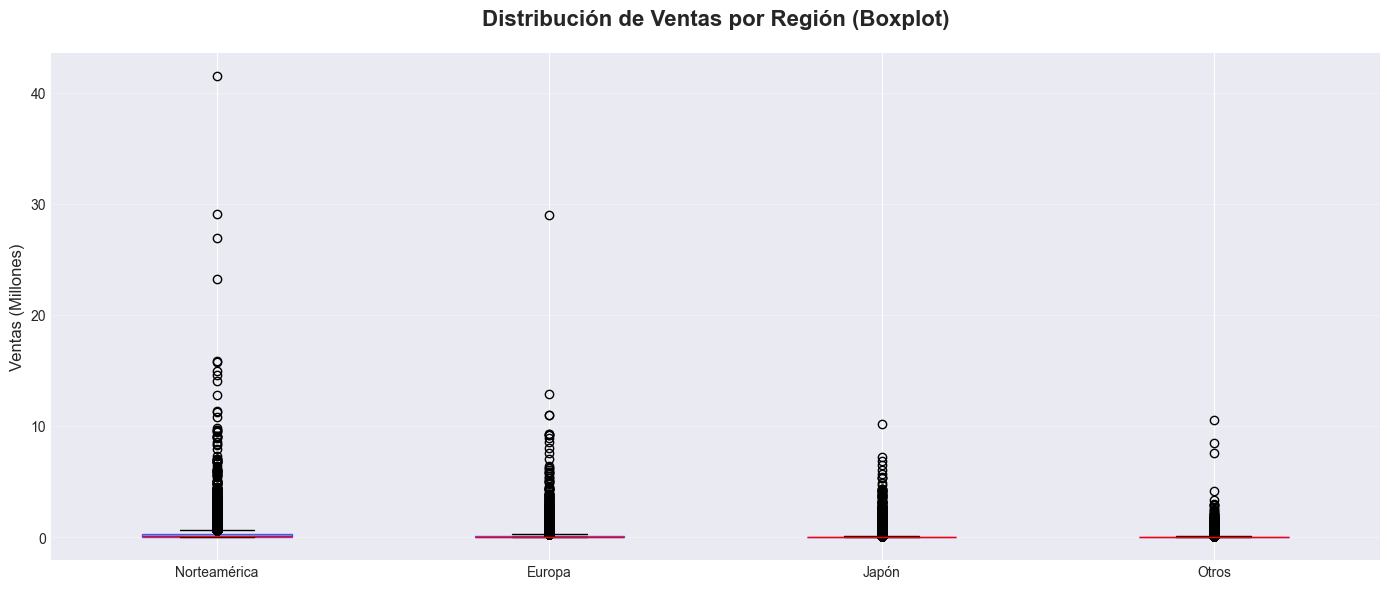

In [23]:
# Boxplot de ventas por región
plt.figure(figsize=(14, 6))
# Preparar datos

datos_boxplot = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# Crear boxplot
bp= plt.boxplot([datos_boxplot['NA_Sales'], datos_boxplot['EU_Sales'], datos_boxplot['JP_Sales'], datos_boxplot['Other_Sales']],
                labels=['Norteamérica', 'Europa', 'Japón', 'Otros'],
                patch_artist=True,  # Permite colorear las cajas
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='blue'))



# Colorear las cajas
# Colorear las cajas
colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)


plt.title('Distribución de Ventas por Región (Boxplot)', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Ventas (Millones)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

